In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import insightface


In [2]:
from insightface.app import FaceAnalysis

In [4]:
app=FaceAnalysis(name='buffalo_l',root='insight_model',providers=['CPUExecutionProvider'])

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insight_model\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insight_model\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insight_model\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insight_model\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insight_model\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5


In [16]:
app.prepare(ctx_id=0,det_size=(640,640))

set det-size: (640, 640)


In [17]:
listdir=os.listdir(path='images')

In [18]:
listdir

['student-Angelina Jolie',
 'student-Chris_Evans',
 'student-Scarlett Johansson',
 'teacher-Barack_Obama',
 'teacher-Morgan_Freeman']

In [19]:
import re
def clean(name):
    string=re.sub(r'[^A-Za-z]',' ',name)
    string=string.upper()
    return string

information=[]
for i in range(len(listdir)):
   role,name=listdir[i].split('-')
   name=clean(name)
   role=role.upper()
  
   folder_name=listdir[i]
   image_files=os.listdir(f'images/{folder_name}')
   
   for files in image_files:
       path=f'./images/{folder_name}/{files}'
       # print(path)
       #read the image
       image=cv2.imread(path)
       #extract features
       feature=app.get(image,max_num=1)
       if(len(feature)>0):
           fet=feature[0]
           
           embedding=fet['embedding']
           information.append([name,role,embedding])

       



      
    
       
    

In [20]:
data_frame=pd.DataFrame(information,columns=['name','role','features'])

In [21]:
data_frame

,name,role,features
0,ANGELINA JOLIE,STUDENT,"[0.078243196, 1.9015108, -0.023396373, -0.9335..."
1,ANGELINA JOLIE,STUDENT,"[0.23105207, 0.97989666, -0.72453475, -0.32067..."
2,ANGELINA JOLIE,STUDENT,"[0.071034595, 2.1639595, -0.34098428, -0.74732..."
3,ANGELINA JOLIE,STUDENT,"[0.48551923, 2.1145887, 0.44635537, -0.6645850..."
4,ANGELINA JOLIE,STUDENT,"[-0.088235125, 1.5141324, -0.18750465, -1.3423..."
5,ANGELINA JOLIE,STUDENT,"[-0.5457799, 1.5319037, -0.12923685, -1.152024..."
6,ANGELINA JOLIE,STUDENT,"[0.944698, 1.6263467, -0.2519758, -1.4123578, ..."
7,ANGELINA JOLIE,STUDENT,"[0.42334592, 0.33403766, 0.12036855, 0.0760050..."
8,ANGELINA JOLIE,STUDENT,"[-0.3637579, 1.3726231, 0.06761612, -0.8575975..."
9,ANGELINA JOLIE,STUDENT,"[0.7520721, 1.2098382, 0.04370396, -1.4506792,..."


In [25]:
#as u can see we have one name repeating many times so we will just have the name of the person once so we need to cure this error 

In [26]:
##################################### INFERENCE STAGE #####################################################################

In [27]:
#what is inference stage ????????
# In the inference stage we need to upload a new image of a person(u can have a webcam associated) 
#get the embeddings (feature extarction)
# apply ML SEARCH/MATCH ALGORITHM TO MATCH FROM THE REDIS DATA_BASE
#and tell the person name


TEST IMAGE READ

In [28]:
test_img=cv2.imread('test_image/avenger.jpg')
cv2.imshow('test_img',test_img)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [31]:
res=app.get(test_img,max_num=0)



In [32]:
len(res)

1

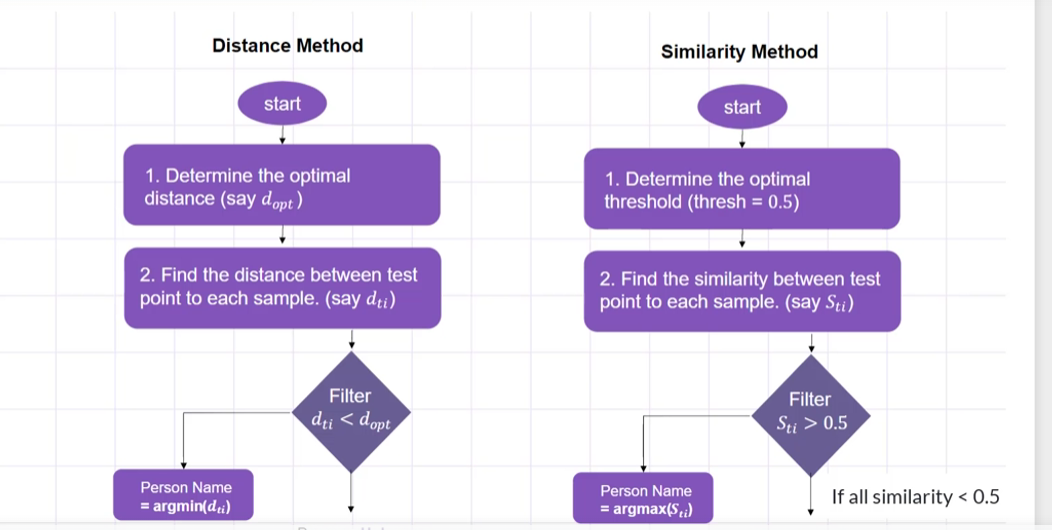


DISTANCE USED-MHT DISTANCE AND COSINE SIMILARITY

In [33]:
for i,rt in enumerate(res):
    bbox=rt['bbox'].astype(int)
    score=int(rt['det_score']*100)
    embed_test=rt['embedding']



In [34]:
len(embed_test)

512

In [35]:
#getting the features into the np array so that we can calculaye the manhattan distance 
list_store=data_frame['features'].tolist()
X=np.asarray(list_store)
X.shape

(50, 512)

In [36]:
from sklearn.metrics import pairwise

In [37]:
Y=embed_test.reshape(1,-1)
e_d=pairwise.euclidean_distances(X,Y)

In [38]:
m_d=pairwise.manhattan_distances(X,Y)

In [39]:
m_d

array([[545.68666588],
       [553.39096721],
       [522.54980422],
       [546.23686915],
       [532.44425383],
       [547.90309443],
       [564.45874221],
       [558.11563988],
       [546.52241898],
       [568.50207945],
       [429.85275096],
       [378.4334826 ],
       [342.33697776],
       [365.73035811],
       [424.85508292],
       [369.35279978],
       [331.43692328],
       [395.95845912],
       [348.31675484],
       [448.35412726],
       [584.00321944],
       [570.85745422],
       [548.25160981],
       [537.78582656],
       [562.66189038],
       [533.7614508 ],
       [576.22351029],
       [544.76873025],
       [549.03829175],
       [578.62178865],
       [542.19847369],
       [575.74268562],
       [564.39197801],
       [572.15701268],
       [544.27255481],
       [546.70720661],
       [529.95148585],
       [542.18782552],
       [526.05704494],
       [549.17744441],
       [558.55681565],
       [547.00970471],
       [593.39721541],
       [552

In [42]:
cosine_sim=pairwise.cosine_similarity(X,Y)

In [43]:
data_search=data_frame.copy()
data_search['euclidian_distance']=e_d
data_search['manhattan_distance']=m_d
data_search['cosine_similarity']=cosine_sim


In [44]:
import matplotlib.pyplot  as plt

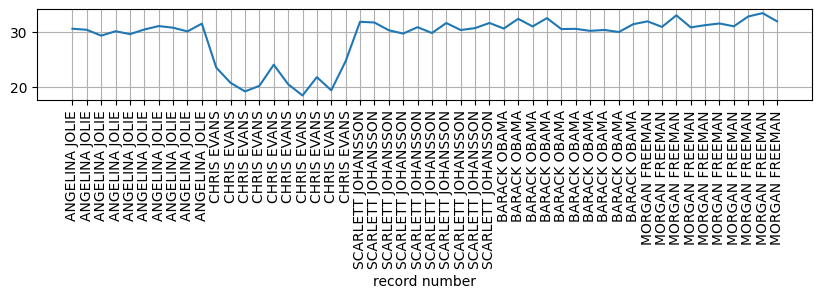

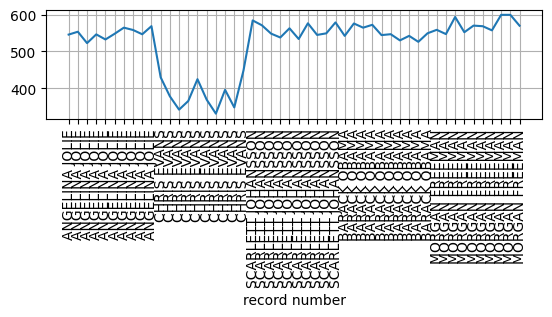

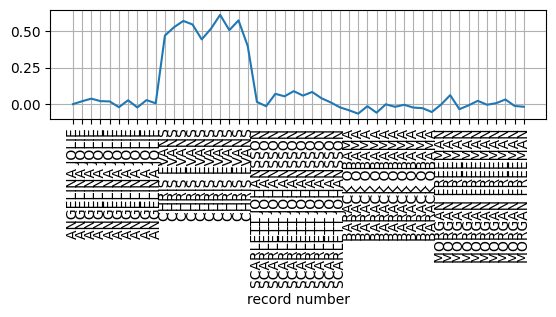

In [58]:
plt.figure(figsize=(10,4))
plt.subplot(3,1,1)
plt.plot(data_search['euclidian_distance'])
plt.xticks(ticks=list(range(len(data_search['euclidian_distance']))),labels=data_search['name'],rotation=90)
plt.xlabel('record number')
plt.grid()
plt.show()
plt.subplot(3,1,2)
plt.plot(data_search['manhattan_distance'])
plt.xticks(ticks=list(range(len(data_search['manhattan_distance']))),labels=data_search['name'],rotation=90)
plt.xlabel('record number')
plt.grid()
plt.show()



plt.subplot(3,1,3)
plt.plot(data_search['cosine_similarity'])
plt.xticks(ticks=list(range(len(data_search['cosine_similarity']))),labels=data_search['name'],rotation=90)
plt.xlabel('record number')
plt.grid()
plt.show()

In [45]:

data_frame

,name,role,features
0,ANGELINA JOLIE,STUDENT,"[0.078243196, 1.9015108, -0.023396373, -0.9335..."
1,ANGELINA JOLIE,STUDENT,"[0.23105207, 0.97989666, -0.72453475, -0.32067..."
2,ANGELINA JOLIE,STUDENT,"[0.071034595, 2.1639595, -0.34098428, -0.74732..."
3,ANGELINA JOLIE,STUDENT,"[0.48551923, 2.1145887, 0.44635537, -0.6645850..."
4,ANGELINA JOLIE,STUDENT,"[-0.088235125, 1.5141324, -0.18750465, -1.3423..."
5,ANGELINA JOLIE,STUDENT,"[-0.5457799, 1.5319037, -0.12923685, -1.152024..."
6,ANGELINA JOLIE,STUDENT,"[0.944698, 1.6263467, -0.2519758, -1.4123578, ..."
7,ANGELINA JOLIE,STUDENT,"[0.42334592, 0.33403766, 0.12036855, 0.0760050..."
8,ANGELINA JOLIE,STUDENT,"[-0.3637579, 1.3726231, 0.06761612, -0.8575975..."
9,ANGELINA JOLIE,STUDENT,"[0.7520721, 1.2098382, 0.04370396, -1.4506792,..."


IDENTIFY_PERSON_USING EUCLIDIAN

 IDENTIFY WITH COSINE SIMILARITY

MOST IMPORTANT TECH IS TO USE COSINE SIMILARITY

WHAT IF THE WE HAVE MULTIPLE IMAGES ?????

MAKE A FUNCTION

In [60]:
#step-1 take collection of data
#step-2 indec face embedding from datafram and convert into array
#step-3 calculate simliarity metric
#step-4 filter data
#step-5 get person name

In [46]:
def ml_search_algo(dataframe,feature_column,test_vector,name_role=['name','role'],cosine_optimal=0.5):

    data_frame=dataframe.copy()
    x_list=data_frame[feature_column].tolist()
    
    x=np.asarray(x_list)
    similar=pairwise.cosine_similarity(x,test_vector.reshape(1,-1))
    similar_arr=np.array(similar).flatten()
    data_frame['cosine']=similar_arr

    data_filter=data_frame.query(f'cosine>={cosine_optimal}')
    if(len(data_filter))>0:
          data_filter.reset_index(drop=True,inplace=True)

          argmax1=data_filter['cosine'].argmax()
    
          name_cos_new,role_cos_new=data_filter.loc[argmax1][['name','role']]
    else:
        name_cos_new="unknow"
        role_cos_new="unknow"

    return name_cos_new,role_cos_new




    
    
    

    
    
    

In [48]:
test_image1=cv2.imread('test_image/morgan_1.jpg')

In [49]:
cv2.imshow('image_show',test_image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [69]:
results_image=app.get(test_image1)

C:\Users\Jay satish patel\Desktop\p_j\attendance_system\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [52]:
test_copy=results_image.copy()

In [53]:
type(test_copy)

list

In [54]:
len(test_copy)

1

In [55]:
#8 face detected

In [56]:
test_copy[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

In [101]:
for res in test_copy:
    x1,y1,x2,y2=res['bbox'].astype(int)
   
    
    embeddings=res['embedding'].reshape(1,-1)
    person_name,role_name=ml_search_algo(data_frame_compress,'features',embeddings,name_role=['name','role'],cosine_optimal=0.5)
    cv2.rectangle(test_image1,(x1,y1),(x2,y2),(0,255,0))
    text_gen=person_name
    cv2.putText(test_image1, text_gen, (x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 0.5, (0, 255, 0), 1)  # Fixed 'FONT_HERSEY_DUPLEX' to 'FONT_HERSHEY_DUPLEX'
    print(person_name)

    

MORGAN FREEMAN


NOW AS WE HAVE MAKE THE ML SEARCH AND DETECTION LETS OPTIMZE
WHY OPTIMIZE ???
AS FOR ONE SINGLE PERSON WE HAVE MANY EMBEDDINGS SO LETS TAKE AVERAGE OF ALL THEM AND KEEP A SINGLE INSTANCE FOR A PERSON THIS HELPS TO REDUCE THE SIZE OF THE STORAGE CAPACIATY


In [102]:
data_frame_compress2=data_frame.groupby(by=['name','role']).mean()

In [103]:
data_frame_compress2.reset_index(inplace=True)

In [104]:
data_frame_compress2

,name,role,features
0,ANGELINA JOLIE,STUDENT,"[0.1988192, 1.4748838, -0.097958855, -0.880505..."
1,BARACK OBAMA,TEACHER,"[-0.22177823, 1.5762169, -0.503078, 0.13601282..."
2,CHRIS EVANS,STUDENT,"[0.35691053, -0.41491055, 0.03921842, -0.15436..."
3,MORGAN FREEMAN,TEACHER,"[0.76278925, 0.89061487, 0.46873555, 0.2589808..."
4,SCARLETT JOHANSSON,STUDENT,"[-0.13535997, -0.2821385, -0.42700845, -0.2825..."


SAVING THE DATA_FRAME_COMPRESS INTO ARRAY AND SAVE INTO ZIP FILE

In [105]:
xvalues=data_frame_compress2.values
col_name=data_frame_compress2.columns


In [106]:
col_name

Index(['name', 'role', 'features'], dtype='object')

In [107]:
np.savez('data_frame_compress2.npz',xvalues,col_name)

In [108]:
file_np=np.load('data_frame_compress2.npz',allow_pickle=True)

In [109]:
file_np.files

['arr_0', 'arr_1']

In [110]:
pd.DataFrame(file_np['arr_0'],columns=file_np['arr_1'])

,name,role,features
0,ANGELINA JOLIE,STUDENT,"[0.1988192, 1.4748838, -0.097958855, -0.880505..."
1,BARACK OBAMA,TEACHER,"[-0.22177823, 1.5762169, -0.503078, 0.13601282..."
2,CHRIS EVANS,STUDENT,"[0.35691053, -0.41491055, 0.03921842, -0.15436..."
3,MORGAN FREEMAN,TEACHER,"[0.76278925, 0.89061487, 0.46873555, 0.2589808..."
4,SCARLETT JOHANSSON,STUDENT,"[-0.13535997, -0.2821385, -0.42700845, -0.2825..."


# REGISTERATION

In [111]:
# # import cv2
# import insightface
# import pandas as pd
# import numpy as np
# import redis

In [112]:
# from insightface.app import FaceAnalysis

In [113]:
# Face_app=FaceAnalysis(name='buffalo_sc',root='insight_model',provides=['CUDAExecutionProvider','CPUExecutionProvider'])

In [114]:
# Face_app.prepare(ctx_id=0,det_size=(640,640),det_thresh=0.5)

In [115]:
# for i in range(3):
#     person_name=input("enter the name of person")
#     role=input('''please choose if you are 
#     1.student
#     2.teacher
#     enter number 1 or 2''')
#     if(role in('1','2')):
#         if(role=='1'):
#             role='STUDENT'
#         elif(role=='2'):
#             role='TEACHER'
#         break
        
#     else:
#             print("invalid input,Try again")
       
            



In [84]:
# key=person_name+'@'+role




In [85]:
# import cv2
#  # Import the FaceApp module (if it's a custom module)

# cap = cv2.VideoCapture(0)
# face_embedding = []
# sample = 0

# # Create an instance of FaceApp (assuming it's a custom class)


# while True:
#     ret, frame = cap.read()

#     if not ret:
#         print('Camera not opened')
#         break

#     # Assuming FaceApp.get() returns a list of face detections
#     result = Face_app.get(frame, max_num=1)
    
#     for res in result:
#         x1, y1, x2, y2 = res['bbox']  # Extract bounding box coordinates
#         x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # Convert to integers
#         frame = cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 1)
#         embed = res['embedding']
#         face_embedding.append(embed)
#         sample = sample + 1

#     if sample >= 200:
#         break

#     cv2.imshow('frame', frame)
#     if cv2.waitKey(1) == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()


In [86]:
# # host_name='redis-17239.c85.us-east-1-2.ec2.cloud.redislabs.com'
# port=17239
# pwd='ZCojZ6VRsSIqMd3GPu5lJRDKAF1PALNS'


In [87]:
# len(face_embedding)

In [88]:
# x_mean=np.asarray(face_embedding).mean(axis=0)
# x_mean.shape

In [89]:
#convert into bytes


In [90]:
# x_mean_bytes=x_mean.tobytes()

# save keys and bytes into redis database

In [91]:
# import redis as 
# r.hset(name='academy:register',key=name_role,value=vector)